# LAB 10 - NEURAL NETWORKS

This lab is comprise of 2 examples:

 - 1. Example MNIST 
     - A) Neural Network
     - B) Convolutional Neural Network
 - 2. CTR
 - 3. Poker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import random
import tensorflow as tf

# Example MNIST

## Preparing the Data

In [3]:
random.seed(88)
np.random.seed(88)
tf.random.set_seed(88)

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [7]:
pd.Series(y_test).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

In [8]:
print('baseline_acc =', 1135/len(y_test))

baseline_acc = 0.1135


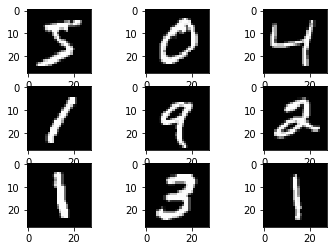

In [9]:
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    
plt.show()

Reshape the image data into length 28*28 = 784 feature vectors, then normalize

In [10]:
X_train.shape

(60000, 28, 28)

In [77]:
X_train_reshaped = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_train_reshaped = X_train.reshape(-1, 28*28)
X_train_normalized = X_train_reshaped/255
X_train_normalized.shape

(60000, 28, 28, 1)

In [78]:
X_test_reshaped = X_test.reshape((X_test.shape[0], 28, 28, 1))
# X_test_reshaped = X_test.reshape(-1, 28*28)
X_test_normalized = X_test_reshaped/255
X_test_normalized.shape

(10000, 28, 28, 1)

### Convert labels to one-hot encoding

In [80]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Neural Network

In [95]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

## Defining the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28, 28, 1)))
model.add(Dense(10, activation='softmax'))

## Compiling the model
opt = RMSprop()
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model
model.fit(X_train_normalized,
          y_train_encoded,
          epochs=5,
          batch_size=128,
          validation_split=0.2)

In [96]:
loss, acc = model.evaluate(X_test_normalized, y_test_encoded)
print(acc)

ValueError: in user code:

    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1224 test_function  *
        return step_function(self, iterator)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1208 run_step  **
        outputs = model.test_step(data)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1177 test_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 10) and (None, 28, 28, 10) are incompatible


## Convolutional Neural Network

In [86]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [84]:
opt = RMSprop()
model2.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.fit(X_train_normalized,
           y_train_encoded,
           epochs=5,
           batch_size=64,
           validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 33s 44ms/step - loss: 0.1981 - accuracy: 0.9388 - val_loss: 0.0637 - val_accuracy: 0.9803
Epoch 2/5
750/750 [==============================] - 44s 59ms/step - loss: 0.0533 - accuracy: 0.9832 - val_loss: 0.0511 - val_accuracy: 0.9859
Epoch 3/5
750/750 [==============================] - 40s 53ms/step - loss: 0.0360 - accuracy: 0.9891 - val_loss: 0.0539 - val_accuracy: 0.9854
Epoch 4/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0413 - val_accuracy: 0.9890
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0318 - accuracy: 0.9907
0.9907000064849854


In [85]:
loss, acc = model2.evaluate(X_test_normalized, y_test_encoded)
print(acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0318 - accuracy: 0.9907
0.9907000064849854


# CTR

# Poker